<h1>Kapitel 3 - Diskreta fördelningar</h1>
Vi kommer här gå igenom några av de fördelningar som vi pratat om under föreläsningen, och hur vi kan implementera och räkna på dem i Python med hjälp av paketet SciPy.<br>
Vi börjar med att importera de paket vi behöver. Den här listan kommer ni känna igen snart.

In [1]:
# Importera nödvändiga paket
import numpy as np
import matplotlib.pyplot as plt

<h3>Generella funktioner i scipy.stats</h3>
Alla fördelningar i SciPy har en rad funktioner kopplade till sig, där vi kan beräkna och ta fram i stort sett alla parametrar vi kan tänkas behöva när vi arbetar med statistik och fördelningar.<br>
Några av de vanligast använda funktionerna är:
<ul>
<li>rvs() - random variates - Den här funktionen ger en NumPy-array med slumpmässiga värden från den givna fördelningen.</li>
<li>pmf() - probability mass function - Den här funktionen beräknar sannolikheten P(X=x) i en given punkt.</li>
<li>cdf() - cumulative distribution function - Den här funktionen beräknar den kumulativa sannolikheten i en given punkt P(X $\leq$ x) = F(x).</li>
<li>stats() - Den här funktionen beräknar medelvärde, varians, skevhet, samt kurtosis (kurtosis är inte del av kursens innehåll).</li>
<li>interval() - Den här funktionen beräknar ett konfidensintervall, kommer mest användas med normal- och t-fördelningen.</li>
</ul>

<h3>Binomialfördelningen</h3>
Den första diskreta fördelningen i Lantz är binomialfördelningen. Binomialfördelningen finns i SciPy under beteckningen 'binom'. Vi tar och importerar den.

In [2]:
from scipy.stats import binom # Importera Binomialfördelningen från SciPy.

<h5>Exempel 3-5</h5>
Produktionen av en viss elektronisk komponent kännetecknas av att endast vart 10:e exemplar fungerar som det ska. Funktionen hos varje enskilt exemplar är oberoende av huruvida andra exemplar fungerar. Produktionstakten är två minuter per komponent.
<ol>
    <li>Vad är det förväntade antalet fungerande komponenter av en timmes produktion, och vad är variansen?</li>
    <li>Hur sannolikt är det att man har <strong>exakt</strong> 2 fungerande komponenter efter en timmes produktion?</li>
    <li>Hur sannolikt är det att man har <strong>minst</strong> 2 fungerande komponenter efter en timmes produktion?</li>

Vi börjar med att definiera våra parametrar för vår fördelning. En binomialfördelning har parameterarna n och p.<br>
p är sannolikheten för ett lyckat försök, i det här fallet en fungerande komponent. Eftersom vart 10:e exemplar fungerar som det ska är p = 1/10 = 0.1.<br>
n är antalet försök. I det här fallet ska vi utvärdera över en timma, och produktionstakten är 2 minuter. Därav blir n antalet försök inom en timma, 60/2 = 30.

In [3]:
p = 0.1 # Sannolikheten för ett lyckat exemplar, givet i exemplet.
n = 30 # Antalet producerade komponenter på en timme, givet i exemplet genom 
       # tiden (60 min) dividerat med produktionstiden per komponent (2 min).
       # 60/2 = 30

Uppgift 1. Här använder vi oss av stats() för att beräkna medelvärdet (mean) och variansen (var) för vår fördelningen. När vi kallar på stats() använder vi oss av våra definierade parametrar n och p. Slutligen printar vi ut resultatet.

In [4]:
mean, var = binom.stats(n=n, p=p) # Beräkna medelvärde och varians med binom.stats()

print('Mean: ' + str(mean)) # Printa medelvärde
print('Variance: ' + str(var)) # Printa varians

Mean: 3.0
Variance: 2.7


Uppgift 2. I uppgift 2 skall vi beräkna sannolikheten att vi får utfallet P(X = 2). Vi använder oss av massfunktionen (pmf), och beräknar sannolikheten för vårt utfall k=2.

In [5]:
result = binom.pmf(k=2, n=n, p=p) # Beräkna sannolikhet P(X=2) med pmf()

print('P(X=2) = ' +str(result)) # Printa resultat

P(X=2) = 0.22765622036690183


Uppgift 3. I uppgift 3 skall vi beräkna sannolikheten att vi får utfallet P(X$\geqslant$2). Genom komplementregeln har vi att P(Xc2) är samma sak som 1 - P(X$\leqslant$1). P(X$\leqslant$1) kan vi få från kumulativa fördelningsfunktionen (cmf) F(X). Vi evaluerar kumulativa fördelningsfunktionen för k=1 och subtraherar det från den totala sannolikheten 1.

In [6]:
result = 1 - binom.cdf(k=1, n=n, p=p) # Beräkna sannolikhet P(X>=2) med cdf()

print('P(X>=2) = ' +str(result)) # Printa resultat

P(X>=2) = 0.8163049808073962


<h3>Poissonfördelningen</h3>
Precis som med binomialfördelningen så finns Poissonfördelningen i SciPy. Vi importerar den för nästa exempel.

In [7]:
from scipy.stats import poisson # Importera Poissonfördelningen från SciPy.

<h5>Exempel 3-6</h5>
En viss typ av motor till en maskin går sönder var 1000:e gång den startas. Per månad startas motorn 200 gånger.
<ol>
    <li>Hur många gånger går motorn i medeltal sönder per år?</li>
    <li>Hur sannolikt är det att den går sönder <strong>exakt</strong> 3 gånger ett visst år</li>
    <li>Hur sannolikt är det att den går sönder <strong>högst</strong> 1 gång ett visst år?</li>

Vi gör som tidigare att vi först definierar paramterarna för vår fördelning. Formellt sett följer vår data en binomialfördelning med p = 0.001 och n = 2400 (200*12). Men eftersom n > 10, p < 0.1, samt E(X) = 2.4 (alltså mellan 0.1-50) kan vi approximera vår datamängd med en Poissonfördelning med $\mu$ = E(X) = 2.4.

In [8]:
mu = 2.4 # Sätt mu till E(X) = 2.4

Uppgift 1. Här kan vi, likt den förra uppgiften, använda oss av stats() för att räkna ut medelvärdet. Vi har dock en Posissonfördelning, som definieras utifrån sitt väntevärde $\mu$, så vi behöver egentligen heller göra den här beräkningen, eftersom vi redan har värdet på $\mu$ = 2.4. <br>
Eftersom det är en poissonfördelning kommer medelvärdet och variansen ha samma värde.

In [9]:
mean, var = poisson.stats(mu=mu) # Beräkna medelvärde och varians med binom.stats()

print('Mean: ' + str(mean)) # Printa medelvärde
print('Variance: ' + str(var)) # Printa varians

Mean: 2.4
Variance: 2.4


Uppgift 2. Här behöver vi beräkna sannolikheten P(X=3), det gör vi med massfunktionen pmf().

In [10]:
result = poisson.pmf(k=3, mu=mu) # Beräkna P(X=3) med pmf()

print('P(X=3) = ' +str(result)) # Printa resultat

P(X=3) = 0.20901416437880638


Uppgift 3. Här behöver vi beräkna sannolikheten P(X$\leq$1) vilket fås ur fördelningsfunktionen F(X) för F(X=1). Det beräknar vi med hjälp av cdf()

In [11]:
result = poisson.cdf(k=1, mu=mu) # Beräkna sannolikheten P(X<=1) med cdf()

print('P(X<=1) = ' +str(result)) # Printa resultat

P(X<=1) = 0.30844104118400245


<h3>Hypergeometriska fördelningen</h3>
Hypergeometriska fördelningen importeras från SciPy som hypergeom. <br>
Dokumentationen för hypergeometriska fördelningen finns <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html>här</a>

In [12]:
from scipy.stats import hypergeom # Importera hypergeometriska fördelningen från SciPy

<h5>Exempel 3-7</h5>
I en viss aktieklubb med ett stort antal medlemmar sätter man ihop sin aktieportfölj genom att slumpmässigt välja ut exakt 5 av 10 möjliga högriskföretag. I efterhand visade det sig att 2 av de 10 företagen gick i konkurs. Hur stor är sannolikheten att en viss medlem hade minst ett konkursföretag med i sin portfölj?

Vi börjar som innan med att bestämma parametrarna för vår fördelning. Här får vi passa oss lite, för Lantz använder andra bokstäver för sina parametrar jämfört med SciPy. Om vi läser i dokumentationen ovan, ser vi att det totala antalet objekt betecknas med 'M', antalet objekt vi är intresserade av betecknas med 'n', och antalet dragna objekt (utan återläggning) ges av 'N'.<br>
Från vår uppgift har vi att antalet totala objekt är M = 10. Antalet objekt vi är intresserade av är n = 2. Och antalet dragna objekt är N = 5. I Lantz bok kallas de här parametrarna R, N och n, vilket är väldigt förvirrande. En lärdom här är att alltid kolla dokumentationen för funktioner man använder sig av!

In [13]:
M = 10 # Antalet totala objekt
n = 2 # Antalet objekt vi är intresserade av
N = 5 # Antalet dragna objekt

Nu behöver vi beräkna sannolikheten att en viss medlem hade minst ett konkursföretag i sin portfölj. Den ges av P(X$\geqslant$1), vilket är samma sak som F(1). Vi kan alltså beräkna sannolikheten med hjälp av kumulativa fördelningsfunktionen cmf().

In [14]:
result = hypergeom.cdf(k=1, M=M, n=n, N=N) # Beräkna P(X>=1) med cdf()

print('P(X<=1) = ' +str(result)) # Printa resultat

P(X<=1) = 0.7777777777777777


<h3>Geometriska fördelningen</h3>
Geometriska fördelnigen importeras från SciPy som 'geom'.
Dokumentationen för geometriska fördelningen finns <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html>här</a>

In [15]:
from scipy.stats import geom # Importera geometriska fördelningen med SciPy

<h5>Exempel 3-8</h5>
Kajsa har just tagit sin civilekonomexamen, och tänker börja söka jobb. Hon söker jobb ett och ett, och hon har sannolikheten 0.1 att få jobb vid varje enskild ansökan.
<ol>
    <li>Hur många jobb kan hon förväntas behöva söka innan hon får ett?</li>
    <li>Hur sannolikt är det att hon får jobb på fjärde försöket?</li>
    <li>Hur många jobb måste hon vara beredd på att söka för att vara minst 50% säker på att få jobb?</li>
</ol>
Vi börjar med att bestämma parametrarna för fördelningen. För den geometriska fördelningen är det enkelt, den har en parameter 'p' som bestämmer sannolikheten för ett lyckat försök. I vårt fall är p = 0.1.

In [16]:
p = 0.1 # Sannolikheten för ett lyckat försök

Uppgift 1. Hur många jobb Kajsa kan förväntas söka innan hon får ett ges av väntevärdet E(X). Det kan vi beräkna m.h.a. stats().

In [17]:
mean, var = geom.stats(p=p) # Beräkna väntevärdet för X~G(p)

print('Mean :' +str(mean)) # Printa resultatet

Mean :10.0


Uppgift 2. Hur sannolikt det är att Kajsa får jobb på fjärde försöket ges av P(X=4), det beräknar vi ur massfunktionen pmf().

In [18]:
result = geom.pmf(k=4, p=p) # Beräkna P(X=4)

print('P(X=4) = ' +str(result)) # Printa resultat

P(X=4) = 0.0729


Uppgift 3. Hur många jobb hon måste söka för att vara minst 50% säker på att få ett jobb räknar Lantz ut genom att göra en tabell över alla F(X) tills resultatet blir högre än 0.5. Ett annat sätt att göra det är att lösa uppgiften grafiskt genom att plotta fördelningen och se var F(X) blir högre än 0.5.

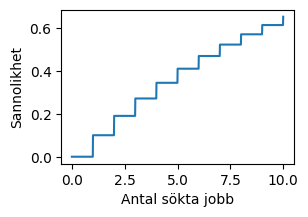

In [19]:
x = np.linspace(0,10,1000) # Generera en array med x-värden från 0-10
y = geom.cdf(k=x, p=p) # Räkna ut värdet på kumulativa fördelningsfunktionen för varje x

fig, ax = plt.subplots() # Skapa en plot med matplotlib
fig.set_figheight(2) # Sätt figurhöjd
fig.set_figwidth(3) # Sätt figurbredd

ax.plot(x,y) # Plotta x vs y
plt.xlabel('Antal sökta jobb') # Sätt label x-axel
plt.ylabel('Sannolikhet') # Sätt label y-axel
plt.show() # Visa plotten

Vi ser här att sannolikheten når över 0.5 vid ungefär X = 7.

<h3>Negativa binomialfördelningen</h3>
Här tänker jag att det är dags att testa på att arbeta själva. Jag har skrivit ett skal som ni kan utgå ifrån.<br>
Dokumentationen för negativa binomialfördelningen hittar ni <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html>här</a>.

In [20]:
from scipy.stats import nbinom

<h5>Exempel 3-9</h5>
Produktionen av en viss elektronisk komponent på AB Nakio misslyckas i 60% av fallen, varvid den defekta komponenten måste kasseras. Man ska leverera 3 exemplar av den aktuella komponenten till en kund, och inget av exemplaren får vara defekt.
<ol>
    <li>Vad är det förväntade antalet komponenter som måste produceras för att man ska få fram 3 fungerande exemplar? Vad är variansen?</li>
    <li>Hur sannolikt är det att det räcker att tillverka 3 komponenter för att få fram 3 fungerande? (Fundera på om du behöver använda formeln för negativ binomialfördelning).</li>
    <li>Hur sannolikt är det att man måste tillverka exakt 7 komponenter för att få fram 3 fungerande?</li>
</ol>

Börja med att sätta parametrarna för fördelningen. Vilka parametrar i Lantz bok motsvarar de i SciPy? Har Lantz och SciPy-dokumentation parametriserat (definierat) fördelningens massfunktion på samma sätt?

In [25]:
n = 3
p = 0.4
mean, var = nbinom.stats(n=n,p=p, loc=n)
print(mean)
print(var)

7.499999999999999
11.249999999999996


Uppgift 1. Beräkna väntevärdet och variansen för fördelningen.

Uppgift 2. Beräkna sannolikheten att de 3 första exemplaren är fungerande. Det här ges av p^3 = 0.4^3 = 0.064.

Uppgift 3. Här behöver vi räkna ut P(X=7). Använd massfunktionen för negativa binomialfördelningen!